### Group Stage Prediction
3 Classes at this stage: Win - Lose - Draw
each team will be ranked based on total score after each match within group

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [2]:
final_df = pd.read_csv('final_df.csv')
final_df.head()

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,Team1_0_Win,Team1_1_Lose,Team1_2_Draw
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0,40,29,31
1,Brazil,Mexico,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0,78,9,13
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0,57,20,23
3,Guinea,Sierra Leone,65,86,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,63.0,59,18,22
4,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0,53,22,25


In [3]:
final_df.shape

(23921, 16)

### Feature engine

In [4]:
final_df = pd.get_dummies(final_df)
final_df

,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,...,Team2_United Arab Emirates,Team2_Uruguay,Team2_Uzbekistan,Team2_Vanuatu,Team2_Venezuela,Team2_Vietnam,Team2_Wales,Team2_Yemen,Team2_Zambia,Team2_Zimbabwe
0,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,...,0,1,0,0,0,0,0,0,0,0
1,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,...,0,0,0,0,0,0,0,0,0,0
2,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,...,0,0,0,0,1,0,0,0,0,0
3,65,86,1,60.0,50.0,68.0,72.0,72.0,63.0,68.0,...,0,0,0,0,0,0,0,0,0,0
4,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,180,153,1,65.0,50.0,65.0,61.0,65.0,50.0,50.0,...,0,0,0,0,0,0,0,0,0,0
23917,192,135,0,65.0,65.0,50.0,50.0,50.0,63.0,67.0,...,0,0,0,0,0,0,0,0,0,0
23918,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,...,0,0,0,0,0,0,0,0,0,0
23919,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = final_df.drop('Team1_Result',axis=1)
y = final_df['Team1_Result']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Scaling
Ta dùng StandardScaler

In [6]:
from sklearn.preprocessing import RobustScaler
from feature_engine.wrappers import SklearnTransformerWrapper

In [7]:
scaler = SklearnTransformerWrapper(transformer= RobustScaler())

In [8]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield,...,Team2_United Arab Emirates,Team2_Uruguay,Team2_Uzbekistan,Team2_Vanuatu,Team2_Venezuela,Team2_Vietnam,Team2_Wales,Team2_Yemen,Team2_Zambia,Team2_Zimbabwe
6522,-0.783133,-0.785714,0.625000,0.60,0.68,0.576923,0.538462,0.666667,0.615385,0.576923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20863,1.180723,1.273810,-0.750000,-0.68,-0.72,-0.769231,-0.769231,-0.708333,-0.730769,-0.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004,1.457831,-0.440476,-0.041667,0.32,0.00,-0.769231,-0.076923,0.208333,0.461538,0.346154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,-0.855422,-0.440476,0.875000,0.28,0.68,0.538462,0.615385,0.250000,0.230769,0.230769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16208,0.036145,-0.309524,0.125000,0.12,0.24,0.269231,0.346154,-0.041667,-0.076923,0.192308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0.734940,1.404762,-0.750000,-0.68,-0.72,-0.769231,-0.769231,-0.708333,-0.730769,-0.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.349398,0.547619,0.208333,-0.68,-0.72,-0.269231,-0.769231,-0.708333,-0.269231,-0.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.867470,0.821429,-0.750000,-0.68,-0.28,-0.769231,-0.769231,-0.708333,-0.730769,-0.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,1.048193,1.142857,-0.750000,-0.68,-0.72,-0.769231,-0.769231,-0.708333,-0.730769,-0.730769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Best feature Selection

In [10]:
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SelectBySingleFeaturePerformance

## BUIL MODELS

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from datetime import datetime

from datetime import timedelta

# Import KFold
from sklearn.model_selection import KFold

In [12]:
models = [
    GaussianNB(),
    RandomForestClassifier(n_estimators=50),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    SVC(kernel='rbf'),
    XGBClassifier(),
]

In [13]:
def get_model_name(model):
    model_name = model.__class__.__name__
    if model_name == 'RandomForestClassifier':
        model_name += '_' + str(model.n_estimators)
    
    return model_name

### Model Selections

In [14]:
# Number of cross validation
kf = KFold(n_splits=10)

# Dataframe to store the model selection results
cv_df = pd.DataFrame(columns=['model', 'mean_score', 'std_score', 'accuracy_train', 'accuracy_test', 'time'])

# Loop through the models
for model in models:
    # Get the model name
    model_name = get_model_name(model)
    # Get the start time
    start_time = datetime.now()
    # Get the cross validation score for the model
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, n_jobs=-1)
    # Get the end time
    end_time = datetime.now()
    # Get the time taken to train the model
    time_taken = end_time - start_time
    # Get the accuracy score for the model
    model.fit(X_train, y_train)
    accuracy_train = round(model.score(X_train, y_train) * 100, 3)
    accuracy_test = round(model.score(X_test, y_test) * 100, 3)
    # Append the model name and score to the dataframe
    cv_df = pd.concat([cv_df, pd.DataFrame.from_records([  #cv_df = cv_df.append(
        {
            'model': model_name,
            'mean_score': cv_score.mean(),
            'std_score': cv_score.std(),
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'time': str(time_taken),
        }])],
                      ignore_index=True,

                      )

In [15]:
metrics = cv_df.sort_values(by=['mean_score'], ascending=False)
metrics

,model,mean_score,std_score,accuracy_train,accuracy_test,time
4,SVC,0.593049,0.009168,62.918,59.147,0:20:20.515125
3,AdaBoostClassifier,0.581880,0.010144,59.418,58.478,0:00:12.239534
5,XGBClassifier,0.573161,0.010656,70.640,57.921,0:01:54.012281
2,RandomForestClassifier_100,0.555721,0.009147,99.176,56.068,0:00:11.489612
1,RandomForestClassifier_50,0.551780,0.010157,99.158,55.413,0:00:08.011442
0,GaussianNB,0.351589,0.014218,38.312,35.405,0:00:03.608706


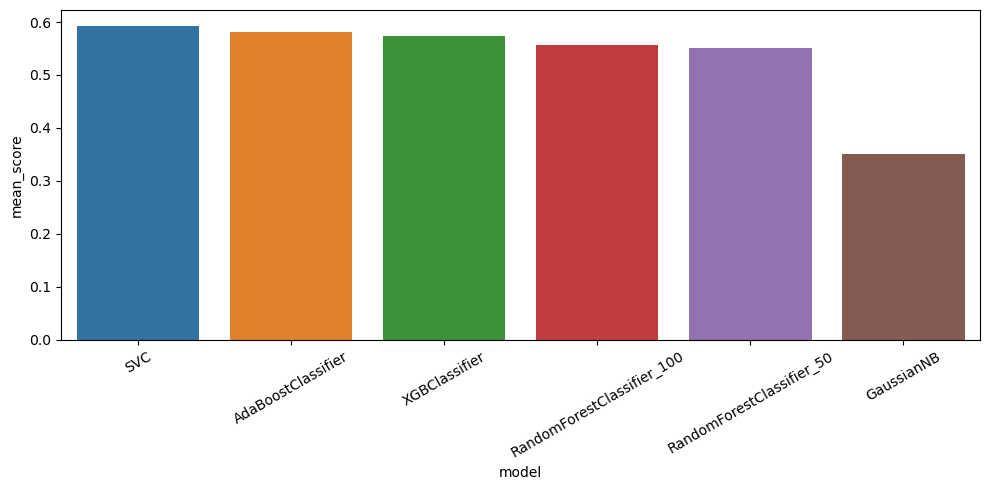

In [16]:
# Plot the cross validation score for the models
plt.figure(figsize=(10, 5), tight_layout=True)
sns.barplot(x='model', y='mean_score', data=metrics)
plt.xticks(rotation=30)
plt.show()

## Comment:
Adaboost là phương án lựa chọn tốt nhất do:
- Thời gian 
- Độ chính xác của mô hình cũng như của tập train và tập test 


### Adaboost - Tuning & validation

In [17]:
# Use GridSearchCV to find the best parameters for the models
from sklearn.model_selection import GridSearchCV

# Create a list of parameters of Logistic Regression for the GridSearchCV
param_grid = {
    'n_estimators': [100,200,500,1000],
    'learning_rate':[0.001,0.01,1]
}
# Create a list of models to test
clf_grid = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_grid, cv=5, n_jobs=-1)
search_clf = clf_grid.fit(X_train, y_train)
best_clf = search_clf.best_estimator_

#Score
cross_clf = cross_val_score(best_clf, X_test, y_test, scoring='accuracy', cv=5, n_jobs=-1)

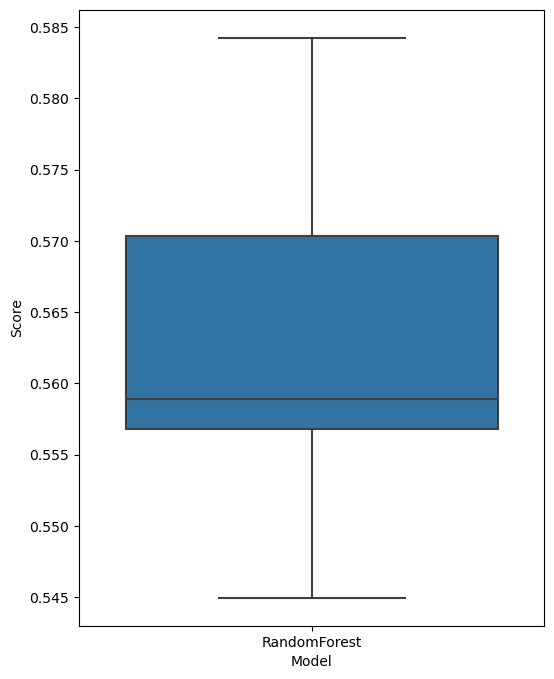

In [18]:
clf_accu = pd.DataFrame(data={'Score': cross_clf, 'Metric': 'Accuracy', 'Model': 'RandomForest'})
plt.figure(figsize=(6, 8))
sns.boxplot(data=clf_accu, x="Model", y="Score")
plt.show()

In [19]:
print('Best params:', search_clf.best_params_)

Best params: {'learning_rate': 1, 'n_estimators': 200}


### Best Params Input

In [25]:
# Create the best model
best_model = AdaBoostClassifier(n_estimators=200,learning_rate=1)
# Fit the best model to the training data
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [26]:
# Get the accuracy score for the best model
accuracy_train = round(best_model.score(X_train, y_train) * 100, 3)
accuracy_test = round(best_model.score(X_test, y_test) * 100, 3)
print('Accuracy score for the best model on the training data: ', accuracy_train)
print('Accuracy score for the best model on the test data: ', accuracy_test)

Accuracy score for the best model on the training data:  59.932
Accuracy score for the best model on the test data:  58.465


              precision    recall  f1-score   support

           0       0.53      0.57      0.55      2013
           1       0.62      0.83      0.71      3559
           2       0.35      0.06      0.10      1605

    accuracy                           0.58      7177
   macro avg       0.50      0.49      0.45      7177
weighted avg       0.54      0.58      0.53      7177



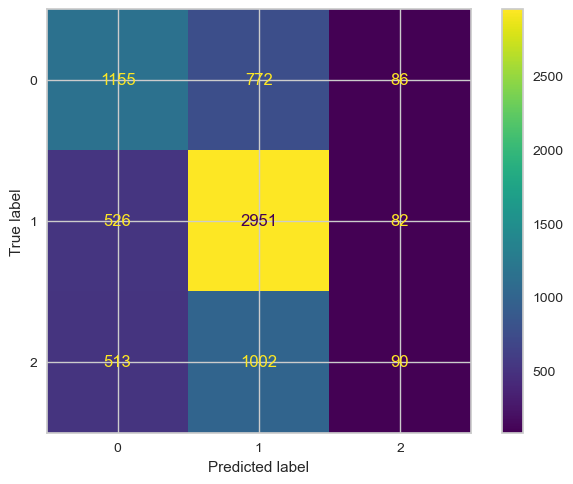

In [27]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [1]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, roc_auc
visualizer = ROCAUC(best_model, classes=y.unique())

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

NameError: name 'best_model' is not defined

### Comment:
- Mô hình phân loại còn chưa được tốt,
- Class 2 còn kém về phân loại và độ chính xác

### SAVE MODEL

In [29]:
import pickle
# Save to file in the current working directory 
pkl_filename = "GroupstageFIFA.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)